In [3]:
import igl
import scipy as sp
import numpy as np
import jax
import jax.numpy as jnp
import jax.random as jrandom
import jax.nn as nn
import jax.lax as lax
import jax.random as jrandom
import jax.nn as nn
import jax.lax as lax
import os
import random
import matplotlib.pyplot as plt
import s2fft
from dataGenerator.spherical_data_generator import *
from utils.sht_helper import *
import jax.numpy.fft as fft

(10, 19, 3)
(40, 21, 3)
(199, 3)
(10, 19, 3)
(3, 10, 19)


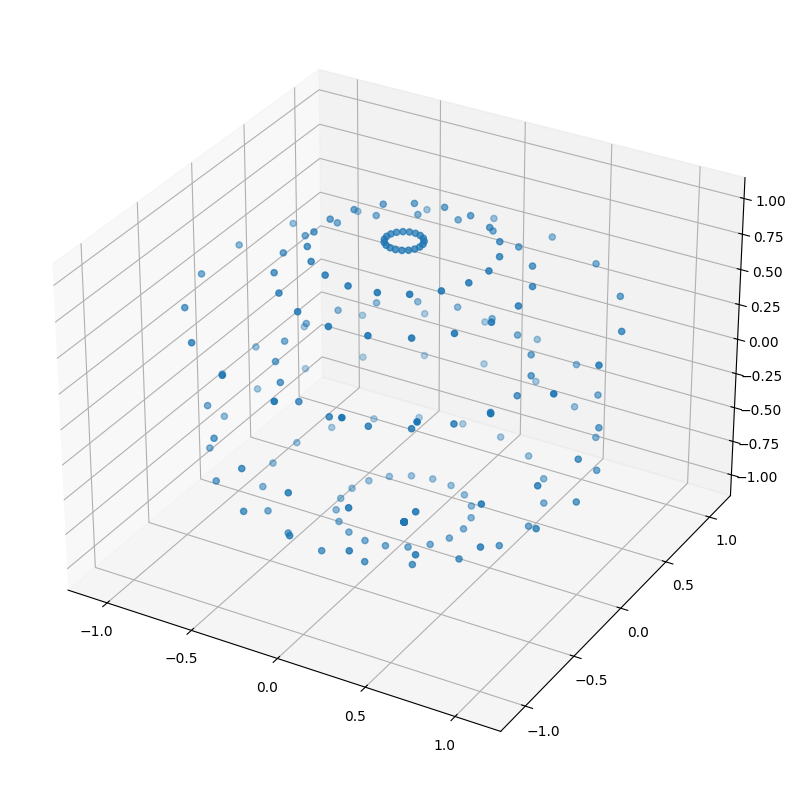

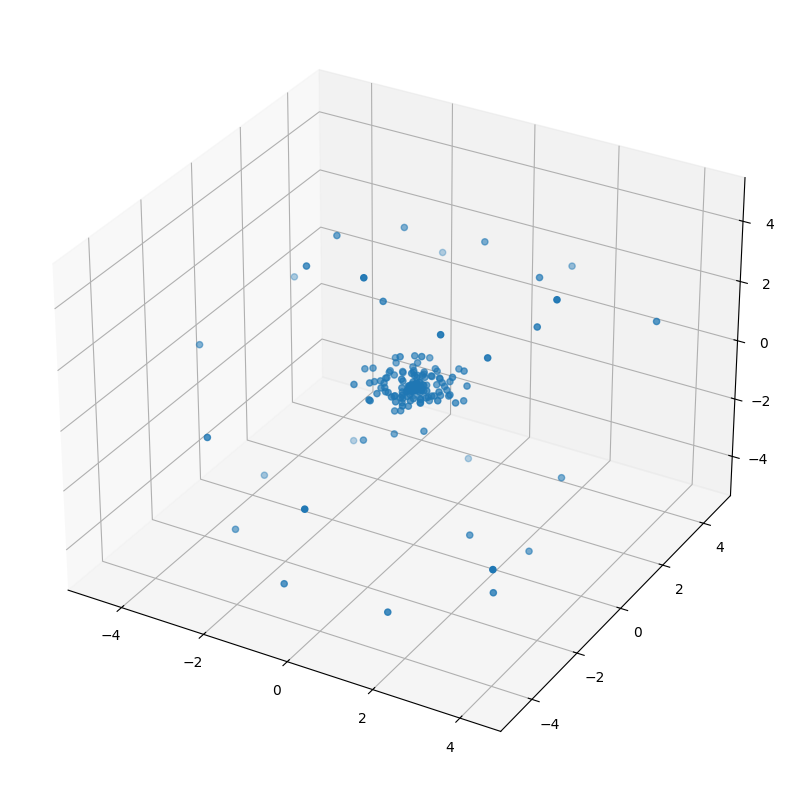

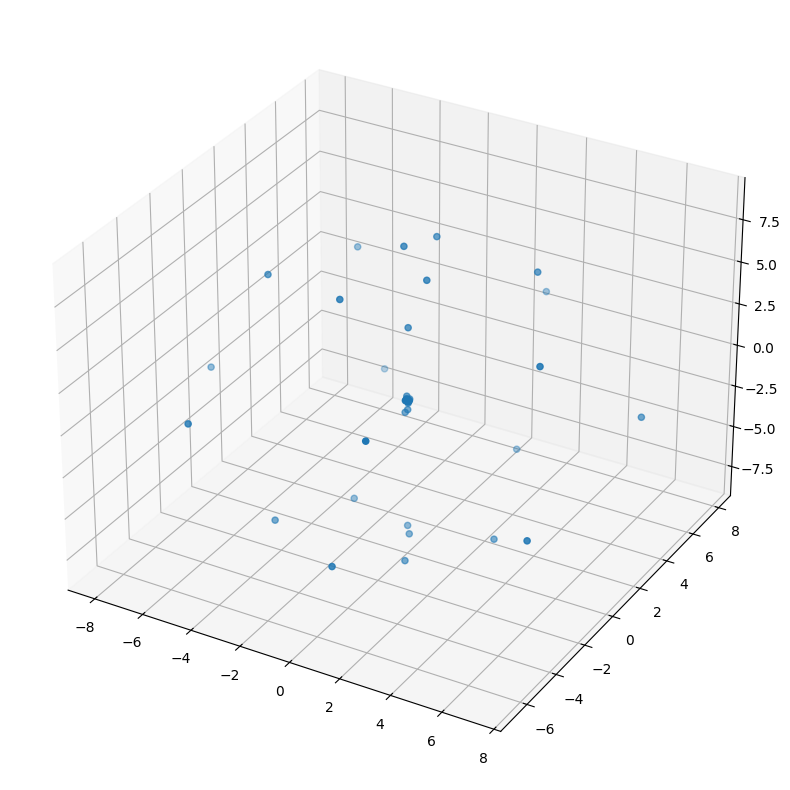

In [4]:
test_sphere_generator = S2ManifoldDataGenerator(
    seed = 42,
    manifold_type = "sphere",
    sampling = "mw",
)
L = 10
batch_size = 1
test_sphere = test_sphere_generator.generate_data(L=L, batch_size=batch_size)[0]
test_sphere_flattened = jnp.reshape(test_sphere, (test_sphere.shape[0] * test_sphere.shape[1], test_sphere.shape[2]))
print(test_sphere.shape)
sphere_rfft2 = fft.rfft2(test_sphere, s=(4*L,4*L), axes=(0,1))
sphere_rfft1 = fft.rfft(test_sphere_flattened, n = 4*L * 4*L, axis=0)
print(sphere_rfft2.shape)
sphere_flm = jax.vmap(lambda x: s2fft.forward(x, L,method="jax", sampling="mw"), in_axes=2)(test_sphere_flattened)
target_L = L
inversed_sphere_rfft2 = fft.irfft2(sphere_rfft2, s=(L,2*L-1), axes=(0,1))
inversed_sphere_rfft1 = fft.irfft(sphere_rfft1, n = L * 2*L-1, axis=0)
print(inversed_sphere_rfft1.shape)
print(inversed_sphere_rfft2.shape)

sphere_flm = jnp.transpose(sphere_flm, (1,2,0))
zero_padded_flm = zero_pad_flm(sphere_flm, target_L)
upsampled_sphere = jax.vmap(lambda x: s2fft.inverse(x, target_L, method="jax", sampling="mw",reality=True), in_axes=2)(zero_padded_flm)
print(upsampled_sphere.shape)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
upsampled_sphere = jnp.transpose(upsampled_sphere, (1,2,0))
ax.scatter(upsampled_sphere[:,:,0], upsampled_sphere[:,:,1], upsampled_sphere[:,:,2])
plt.show()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inversed_sphere_rfft2[:,:,0], inversed_sphere_rfft2[:,:,1], inversed_sphere_rfft2[:,:,2])
plt.show()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inversed_sphere_rfft1[:,0], inversed_sphere_rfft1[:,1], inversed_sphere_rfft1[:,2])
plt.show()

